# Ontology building on StanfordOpenIE

In [1]:
import json
with open('stanfordOpenIE_allfilters.json', 'r') as openfile:
  read_json = json.load(openfile)
triplets = read_json
for triple in triplets:
  assert len(triple) == 3
triplets

[['possibility', 'analyze', 'everyday monetary transaction'],
 ['real world datum', 'be compare to', 'present'],
 ['macroscopic property', 'be compare to', 'real world datum'],
 ['Dániel Kondor', 'analyze Bitcoin in', 'paper'],
 ['complete list', 'be', 'where publicly available'],
 ['currency system', 'is', 'digital'],
 ['Dániel Kondor', 'reconstruct', 'network of transaction'],
 ['list', 'is', 'complete'],
 ['measure network characteristic', 'is such', 'degree distribution'],
 ['statistic', 'is', 'microscopic'],
 ['complete list', 'be', 'where publicly available'],
 ['currency system', 'is', 'digital'],
 ['complete list', 'be', 'where publicly available'],
 ['transaction', 'be', 'announce'],
 ['Dániel Kondor', 'have', 'download'],
 ['Dániel Kondor', 'structure of', 'network of transaction'],
 ['complete list', 'be', 'where publicly available'],
 ['complete list', 'be', 'where publicly available'],
 ['measure network characteristic', 'have identify', 'two distinct phase'],
 ['measure n

In [2]:
len(triplets)

7585

In [3]:
! pip install finbert-embedding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Relation Ontology

In [4]:
import numpy as np
import pandas as pd

relations = np.array(triplets)[:, 1]

In [5]:
relations.shape

(7585,)

In [6]:
unique_rel, count = np.unique(relations, return_counts = True)
rel_dict = dict(zip(unique_rel, count))
rel_dict = dict(sorted(rel_dict.items(), key = lambda x: x[1], reverse = True))
rel_dict

{'is': 1939,
 'is in': 455,
 'is of': 418,
 'be': 297,
 'is for': 271,
 'is on': 247,
 'is to': 227,
 'is with': 199,
 'has': 168,
 'is from': 110,
 'is between': 106,
 'is by': 103,
 'is as': 72,
 'is such': 69,
 'have': 63,
 'is at': 48,
 'of': 43,
 'is over': 33,
 'is into': 28,
 'is than': 28,
 'find': 26,
 'use': 26,
 'become': 23,
 'provide': 23,
 'is through': 21,
 'is among': 20,
 'is against': 16,
 'apply': 14,
 'propose': 14,
 'include': 13,
 'is due': 13,
 'is like': 13,
 'exhibit': 12,
 'is about': 12,
 'is across': 12,
 'is during': 12,
 'is after': 11,
 'make': 10,
 'is along': 9,
 'is despite': 9,
 'is per': 9,
 'is without': 9,
 'consider': 8,
 'in': 8,
 'is under': 8,
 'realize': 8,
 'show': 8,
 'analyse': 7,
 'be base on': 7,
 'characterize': 7,
 'create': 7,
 'employ': 7,
 'follow': 7,
 'identify': 7,
 'introduce': 7,
 'is within': 7,
 'reveal': 7,
 'as': 6,
 'base on': 6,
 'consider in': 6,
 'observe in': 6,
 'offer': 6,
 'remain': 6,
 'represent': 6,
 'affect': 5,


In [7]:
len(rel_dict)

1636

#### Generating Embeddings for each relation

In [8]:
from finbert_embedding.embedding import FinbertEmbedding

finbert = FinbertEmbedding()

token_emb = {}
# rel_combined = list(set(" ".join(rel_dict.keys()).split(" ")))
for i in rel_dict.keys():
  word_embedding = finbert.word_vector(i)
  token_emb[i] = word_embedding

In [9]:
assert rel_dict.keys() == token_emb.keys()

In [10]:
final_embedding = {}

for key in token_emb.keys():
  numpy_tensor = []
  for i in token_emb[key]:
    numpy_tensor.append(i.numpy())
  numpy_tensor = np.array(numpy_tensor)
  final_embedding[key] = np.mean(numpy_tensor, axis = 0)

In [11]:
assert rel_dict.keys() == final_embedding.keys()
assert token_emb.keys() == final_embedding.keys()

for i in final_embedding:
  assert final_embedding[i].shape[0] == 768

#### Converting Relation Embedding Dict into panadas DataFrame

In [12]:
data = pd.DataFrame(final_embedding.values(), index = final_embedding.keys())
data

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
is,-2.863713,-0.232771,-0.777102,-0.413350,1.984296,3.094166,-0.750068,0.161551,1.484904,-5.021338,...,-0.204414,-2.729815,-1.419231,-1.044560,-1.829473,-2.347007,4.022555,0.374099,0.343072,0.336154
is in,-1.290344,-2.374374,0.710759,-2.091382,2.559954,2.126047,-0.462411,-0.427899,0.528780,-2.701677,...,-1.178940,-1.742929,-0.247869,-0.958666,-2.597205,-1.284091,2.472987,-0.301398,0.797585,1.064952
is of,-2.534064,-1.127240,0.724256,-2.896423,3.201965,-0.147244,0.064452,-1.314243,-0.488179,-2.457188,...,-1.678758,-2.469892,-1.032201,-1.064551,-3.077995,-1.784761,2.489115,-0.207236,0.895658,0.838969
be,1.331915,-0.446903,-0.444302,-1.006841,1.380263,2.111643,0.062852,0.278242,3.972542,-6.316217,...,0.826859,-1.567798,-2.469906,-1.422467,-2.023844,-2.425972,3.619842,-0.685051,-1.124934,0.128575
is for,-0.639549,-1.793476,0.870523,-2.653036,3.615763,1.679898,0.084465,-0.818330,0.532856,-2.453318,...,-1.382514,-2.149526,-1.882350,-0.955592,-3.430961,-0.565566,3.299810,-0.617072,-0.124953,0.476361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
would place,-0.991157,-1.341649,0.334676,-1.313043,3.963721,1.540077,0.142827,-0.953517,1.446545,-3.920687,...,-0.133514,1.084164,0.403103,-0.425380,-3.157691,-2.858480,2.618212,-0.262060,0.965449,-0.871647
would provide,-0.393501,-1.317480,-0.411442,-1.206155,2.708642,2.303343,-0.777563,-0.056121,2.153249,-3.414191,...,-0.616989,0.298264,-0.629910,-0.885617,-2.535391,-3.323925,2.629255,-0.715894,2.006780,-0.851186
would recommend datum,-0.662136,1.343097,1.251007,-1.574713,3.227307,0.427842,0.863229,2.387486,1.965043,-3.689824,...,1.505175,-0.219548,-0.468476,-2.808539,-1.820380,-2.193038,-0.232860,-0.807699,0.743276,5.449749
would take advantage of,-1.541805,-2.308632,0.399888,0.456259,1.761971,0.489570,-3.709814,2.555432,1.712280,-3.464057,...,-0.491211,0.072127,0.227224,-0.228690,-1.508223,-0.988771,0.884538,-1.998562,0.751798,-0.378665


#### Hierarchial Clustering

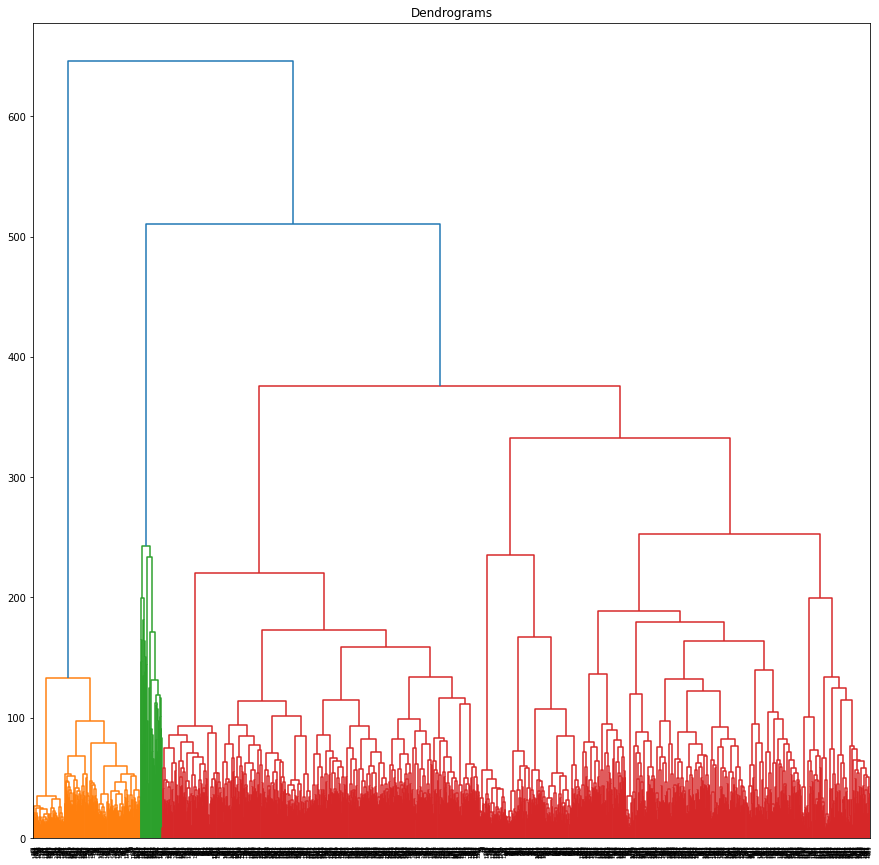

In [13]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 15))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [14]:
from sklearn.cluster import AgglomerativeClustering

n_cluster = 50
clustering = AgglomerativeClustering(linkage = "ward", n_clusters = n_cluster)
clustering.fit(data)
clusters = clustering.labels_

In [15]:
clusters

array([10, 15, 15, ..., 12, 40, 10])

In [16]:
cluster_dict = {}
for i in range(n_cluster):
  cluster_dict[i] = data.index[np.where(clusters == i)]
cluster_dict

{0: Index(['focus on', 'obtain by', 'obtain from', 'assume with', 'believe in',
        'believe on', 'can assume', 'deal with', 'do believe', 'focus at',
        'go back from', 'go to', 'go until', 'happen at', 'hide in', 'know as',
        'learn effectively from', 'look in', 'mainly focus on',
        'must also focus in', 'obtain with', 'pay attention to', 'return to',
        's as', 'therefore pay attention to', 'arrive at', 'believe as',
        'can assume as', 'choose in', 'come from', 'come however with',
        'come out as', 'come without', 'concentrate on', 'cope with',
        'destroy turnover', 'do also calculate', 'do in', 'do learn of',
        'enjoy with', 'focus in', 'get to', 'go as', 'grow with',
        'have focus on', 'here focus on', 'know for', 'know to',
        'learn algorithm', 'look at', 'look back', 'obtain for', 'obtain in',
        'obtain via', 'of t is', 'protect against', 'react during', 'react to',
        'return in', 'return of', 'return over

In [17]:
common_financial_verbs = [
    'buy', 'sell', 'crypto', 'trade', 'price', 'transfer', 'perturb', 'yield', 'invest'
]

In [18]:
max_cluster_rel_dict = {}
for key, value in cluster_dict.items():
  tok = " ".join(value)
  flag = 0
  for verb in common_financial_verbs:
    if verb in tok:
      max_cluster_rel_dict[key] = verb
      flag = 1
  if flag == 0:
    max = 0
    for val in value:
      if rel_dict[val] >= max:
        max = rel_dict[val]
        max_cluster_rel_dict[key] = val
max_cluster_rel_dict

{0: 'sell',
 1: 'invest',
 2: 'have for',
 3: 'depend on',
 4: 'precede',
 5: 'characterize',
 6: 'accord to',
 7: 'trade',
 8: 'correspond to',
 9: 'significantly outperform',
 10: 'yield',
 11: 'entail',
 12: 'may have',
 13: 'number of',
 14: 'invest',
 15: 'is in',
 16: 'significantly simplify',
 17: 'lastly introduce',
 18: 'also motivate',
 19: 'be proportional to',
 20: 'thereby advance',
 21: 'crypto',
 22: 'invest',
 23: 'trade',
 24: 'even jump of',
 25: 'diagnose',
 26: 'debunk',
 27: 'reminisce',
 28: 'categorize',
 29: 'endorse',
 30: 'however require',
 31: 'invest',
 32: 'reconstruct',
 33: 'typically become in',
 34: 'decompose',
 35: 'is over',
 36: 'Asgari',
 37: 'anticipate',
 38: 'also find',
 39: 'invest',
 40: 'invest',
 41: 'deem',
 42: 'perturb',
 43: 'price',
 44: 'invest',
 45: 'lag',
 46: 'play role in',
 47: 'datum',
 48: 'prevail',
 49: 'underestimate'}

In [19]:
## Assigning each relation to a class as determined by the above algo
relation_cluster_ontology = {}
for key, value in cluster_dict.items():
  for val in value:
    relation_cluster_ontology[val] = max_cluster_rel_dict[key].upper()
relation_cluster_ontology

{'focus on': 'SELL',
 'obtain by': 'SELL',
 'obtain from': 'SELL',
 'assume with': 'SELL',
 'believe in': 'SELL',
 'believe on': 'SELL',
 'can assume': 'SELL',
 'deal with': 'SELL',
 'do believe': 'SELL',
 'focus at': 'SELL',
 'go back from': 'SELL',
 'go to': 'SELL',
 'go until': 'SELL',
 'happen at': 'SELL',
 'hide in': 'SELL',
 'know as': 'SELL',
 'learn effectively from': 'SELL',
 'look in': 'SELL',
 'mainly focus on': 'SELL',
 'must also focus in': 'SELL',
 'obtain with': 'SELL',
 'pay attention to': 'SELL',
 'return to': 'SELL',
 's as': 'SELL',
 'therefore pay attention to': 'SELL',
 'arrive at': 'SELL',
 'believe as': 'SELL',
 'can assume as': 'SELL',
 'choose in': 'SELL',
 'come from': 'SELL',
 'come however with': 'SELL',
 'come out as': 'SELL',
 'come without': 'SELL',
 'concentrate on': 'SELL',
 'cope with': 'SELL',
 'destroy turnover': 'SELL',
 'do also calculate': 'SELL',
 'do in': 'SELL',
 'do learn of': 'SELL',
 'enjoy with': 'SELL',
 'focus in': 'SELL',
 'get to': 'SEL

In [20]:
assert relation_cluster_ontology.keys() == rel_dict.keys()

#### Final Type of Relations

In [21]:
relation_class = list(set([i.upper() for i  in list(max_cluster_rel_dict.values())]))
relation_class

['ALSO MOTIVATE',
 'IS IN',
 'PREVAIL',
 'THEREBY ADVANCE',
 'HAVE FOR',
 'DATUM',
 'MAY HAVE',
 'DEPEND ON',
 'CHARACTERIZE',
 'ALSO FIND',
 'SELL',
 'TRADE',
 'SIGNIFICANTLY SIMPLIFY',
 'UNDERESTIMATE',
 'DEEM',
 'PRICE',
 'CORRESPOND TO',
 'TYPICALLY BECOME IN',
 'YIELD',
 'ENDORSE',
 'INVEST',
 'RECONSTRUCT',
 'DEBUNK',
 'ASGARI',
 'SIGNIFICANTLY OUTPERFORM',
 'DECOMPOSE',
 'CRYPTO',
 'NUMBER OF',
 'IS OVER',
 'ACCORD TO',
 'HOWEVER REQUIRE',
 'EVEN JUMP OF',
 'CATEGORIZE',
 'LASTLY INTRODUCE',
 'DIAGNOSE',
 'BE PROPORTIONAL TO',
 'PRECEDE',
 'PLAY ROLE IN',
 'PERTURB',
 'ENTAIL',
 'LAG',
 'ANTICIPATE',
 'REMINISCE']

In [22]:
len(relation_class)

43

## Entity Ontology

In [23]:
import numpy as np
import pandas as pd

entities = np.append(np.array(triplets)[:, 0], np.array(triplets)[:, 2])

In [24]:
entities.shape

(15170,)

In [25]:
unique_entities, count = np.unique(entities, return_counts = True)
entities_dict = dict(zip(unique_entities, count))
entities_dict = dict(sorted(entities_dict.items(), key = lambda x: x[1], reverse = True))
entities_dict

{'future': 240,
 'present': 202,
 'model': 194,
 'time': 107,
 'Bitcoin': 105,
 'other': 80,
 'cryptocurrencie': 79,
 'market': 71,
 'result': 64,
 'volatility': 61,
 'high': 59,
 'price': 58,
 'different': 55,
 'large': 52,
 'one': 52,
 'paper': 52,
 'that': 52,
 'financial': 51,
 'return': 51,
 'cryptocurrency market': 50,
 'study': 50,
 'the future': 49,
 'current': 46,
 'value': 43,
 'property': 42,
 'asset': 41,
 'currency': 40,
 'analysis': 39,
 'network': 39,
 'long': 38,
 'new': 37,
 'investor': 36,
 'short': 36,
 'approach': 35,
 'small': 35,
 'cryptocurrency': 34,
 'period': 34,
 'feature': 33,
 'statistical': 33,
 'bitcoin': 32,
 'social': 32,
 'system': 32,
 'user': 32,
 'correlation': 31,
 'datum': 31,
 'trader': 29,
 'now': 28,
 'economic': 27,
 'recently': 27,
 'several': 27,
 'particular': 26,
 '2014': 25,
 'low': 25,
 'method': 25,
 'same': 25,
 '2013': 24,
 '2016': 24,
 'change': 24,
 'real': 24,
 'term': 24,
 'use': 24,
 'Our': 23,
 'deep': 23,
 'dynamic': 23,
 'mine

In [26]:
len(entities_dict)

5594

#### Generating Embeddings for each Entity

In [27]:
from finbert_embedding.embedding import FinbertEmbedding

finbert_en = FinbertEmbedding()

entity_token_emb = {}
# rel_combined = list(set(" ".join(rel_dict.keys()).split(" ")))
for i in entities_dict.keys():
  word_embedding = finbert_en.word_vector(i)
  entity_token_emb[i] = word_embedding

In [28]:
assert entities_dict.keys() == entity_token_emb.keys()

In [29]:
entity_final_embedding = {}

for key in entity_token_emb.keys():
  numpy_tensor = []
  for i in entity_token_emb[key]:
    numpy_tensor.append(i.numpy())
  numpy_tensor = np.array(numpy_tensor)
  entity_final_embedding[key] = np.mean(numpy_tensor, axis = 0)

In [30]:
assert entities_dict.keys() == entity_final_embedding.keys()
assert entity_token_emb.keys() == entity_final_embedding.keys()

for i in entity_final_embedding:
  assert entity_final_embedding[i].shape[0] == 768

#### Converting Entity Embedding Dict into panadas DataFrame

In [31]:
entity_data = pd.DataFrame(entity_final_embedding.values(), index = entity_final_embedding.keys())
entity_data

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
future,-1.032358,0.122009,-1.386569,-1.109125,4.102249,2.936886,-0.237045,1.586890,-1.453797,-5.202733,...,-1.563134,1.063009,0.529733,-1.086973,1.351635,-2.670698,1.635224,-2.458868,-1.763119,-4.338936
present,-3.335910,2.892087,-1.249220,-0.238075,1.683522,1.076676,0.455045,2.891020,1.474119,-4.746337,...,0.129052,-0.373270,-4.049481,-1.917212,-1.755011,-3.352115,2.775335,-0.691684,0.089528,-2.356278
model,-2.001286,0.960699,-0.313204,-0.108324,3.483050,3.646119,0.318405,-0.308711,-0.819537,-5.882162,...,0.945766,-0.747382,-2.536995,-2.862435,-1.378481,-3.378901,2.711117,0.142842,-0.635836,0.237675
time,-0.272841,1.362566,-0.828931,-0.810933,4.477133,2.981641,0.481599,0.719027,-0.272348,-6.296786,...,1.154083,-1.819470,-1.221797,-1.832840,-0.095861,-2.327689,3.754240,1.395251,0.911370,-0.961081
Bitcoin,-2.393842,-4.525390,5.411202,1.751484,17.445236,6.125531,-9.414983,4.518653,-4.048374,-0.198474,...,-1.969275,1.146046,-4.443971,-11.030018,-1.689454,-1.913654,-2.198191,-4.324292,-2.787411,4.073734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
α diversity,-1.620083,-0.516028,-1.352475,-1.911534,1.516236,1.151702,0.633495,0.584216,0.055167,-4.571563,...,1.074279,1.127899,-0.333389,-1.028572,-2.421938,-3.559893,3.043383,2.055080,2.287415,0.111356
λ 2,-1.080110,-0.990233,0.231444,-2.244364,2.501361,0.942711,-0.371135,0.302578,1.559970,-3.955815,...,2.703128,-0.043180,-2.592785,-0.876538,-1.253544,-2.831737,3.227013,1.321007,2.342628,1.327672
λBt 1,-4.071470,-0.695958,-0.281906,-2.259287,4.221259,1.864178,0.805500,-0.833072,-0.930549,-3.237957,...,0.248282,0.139145,-1.424943,-2.523487,0.553273,-3.639513,4.294932,0.164855,-0.863569,-0.165807
ρ q,-1.329936,0.427619,0.321832,-1.183649,3.990660,2.379362,2.713877,-0.333500,1.189761,-1.725128,...,-1.158269,-1.474676,-0.475149,-2.038955,-1.820866,-3.162975,1.435348,-1.468082,-0.823675,0.102927


#### Hierarchial Clustering

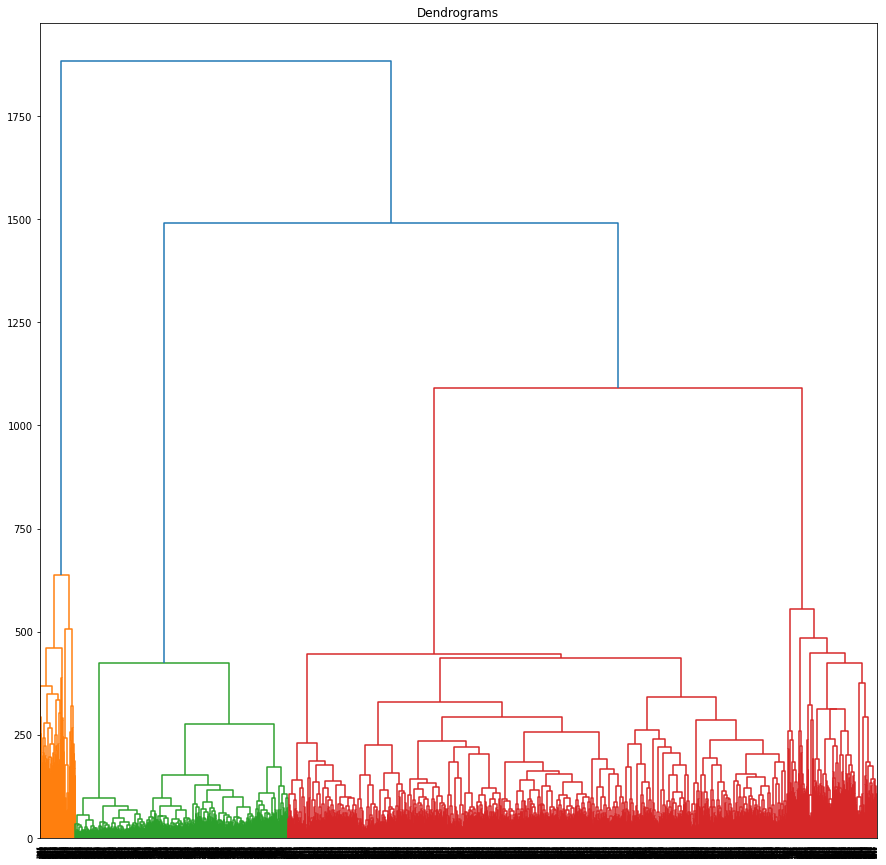

In [32]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 15))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(entity_data, method='ward'))

In [44]:
from sklearn.cluster import AgglomerativeClustering

n_cluster = 30
clustering = AgglomerativeClustering(linkage = "ward", n_clusters = n_cluster)
clustering.fit(entity_data)
clusters = clustering.labels_

In [45]:
clusters

array([ 8,  8,  8, ...,  1, 18,  1])

In [46]:
entity_cluster_dict = {}
for i in range(n_cluster):
  entity_cluster_dict[i] = entity_data.index[np.where(clusters == i)]
entity_cluster_dict

{0: Index(['Bitcoin', 'bitcoin', 'price of Bitcoin', 'BitCoin', 'popcoin',
        'particular bitcoin', 'altcoin', 'characteristic of Bitcoin',
        'particular bitcoin Bitcoin', 'price of bitcoin', 'qBitcoin',
        'Namecoin', 'alternative to Bitcoin', 'case of Bitcoin',
        'context of Bitcoin', 'correlation between bitcoin',
        'cryptocurrency Bitcoin', 'feature of bitcoin', 'first time Bitcoin',
        'fundamental of BitCoin', 'model bitcoin', 'movement of Bitcoin',
        'particularly cryptocurrency bitcoin', 'price for Bitcoin',
        'relation to Bitcoin', 'risk of Bitcoin', 'second Bitcoin',
        'superior to Bitcoin', 'that bitcoin', 'that of Bitcoin',
        'trade Bitcoin', 'traditional Bitcoin', 'volatility of Bitcoin'],
       dtype='object'),
 1: Index(['daily', 'most popular', 'real time', 'source', 'Twitter sentiment',
        'individual', 'information transfer', 'complete list', 'open',
        'dataset',
        ...
        'vary behavior', 

#### Applying NER on these Clusters to find appropriate class

In [47]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [48]:
entity_cluster_NER = {}
for key, value in entity_cluster_dict.items():
  temp = []
  for val in value:
    doc = nlp(str(val))
    for ent in doc.ents:
      temp.append(ent.label_)
  if len(temp) == 0:
    temp.append("MISCELLANEOUS")
  entity_cluster_NER[key] = temp
entity_cluster_NER

{0: ['ORG',
  'PERSON',
  'PERSON',
  'ORG',
  'ORG',
  'PERSON',
  'ORDINAL',
  'PERSON',
  'ORG',
  'ORG',
  'ORG',
  'ORDINAL',
  'ORG',
  'PERSON',
  'PERSON',
  'PERSON'],
 1: ['DATE',
  'PRODUCT',
  'DATE',
  'ORG',
  'CARDINAL',
  'NORP',
  'ORG',
  'ORDINAL',
  'LAW',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'PRODUCT',
  'ORG',
  'GPE',
  'GPE',
  'CARDINAL',
  'ORG',
  'ORG',
  'DATE',
  'DATE',
  'ORG',
  'CARDINAL',
  'ORDINAL',
  'ORDINAL',
  'ORDINAL',
  'ORDINAL',
  'ORDINAL',
  'CARDINAL',
  'ORG',
  'ORG',
  'CARDINAL',
  'DATE',
  'ORDINAL',
  'LAW',
  'LAW',
  'CARDINAL',
  'DATE',
  'DATE',
  'DATE',
  'ORG',
  'ORG',
  'PERSON',
  'CARDINAL',
  'CARDINAL',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'ORG',
  'CARDINAL',
  'CARDINAL',
  'ORG',
  'PRODUCT',
  'MONEY',
  'ORG',
  'DATE',
  'ORG',
  'ORG',
  'DATE',
  'ORG',
  'ORG',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'DATE',
  'ORG',
  'ORG',
  'ORG',
  'CARDINAL',
  'DATE',
  'DATE',
  'CARDINAL',
  'ORDINAL',

In [49]:
## Calculating frequency of type of entities in each cluster
entity_cluster_NER_count = {}
for key, value in entity_cluster_NER.items():
  unique, count = np.unique(value, return_counts = True)
  ner_count = dict(zip(unique, count))
  ner_count = dict(sorted(ner_count.items(), key = lambda x: x[1], reverse = True))
  entity_cluster_NER_count[key] = ner_count
entity_cluster_NER_count

{0: {'ORG': 7, 'PERSON': 7, 'ORDINAL': 2},
 1: {'ORG': 36,
  'CARDINAL': 24,
  'ORDINAL': 21,
  'DATE': 20,
  'LAW': 4,
  'PRODUCT': 3,
  'GPE': 2,
  'MONEY': 1,
  'NORP': 1,
  'PERSON': 1},
 2: {'ORG': 5, 'GPE': 1, 'PRODUCT': 1},
 3: {'ORG': 1},
 4: {'MISCELLANEOUS': 1},
 5: {'PERSON': 51, 'ORG': 10, 'NORP': 2},
 6: {'MISCELLANEOUS': 1},
 7: {'ORG': 27, 'DATE': 4, 'CARDINAL': 2, 'PERSON': 1},
 8: {'DATE': 35,
  'ORG': 14,
  'CARDINAL': 9,
  'GPE': 9,
  'NORP': 9,
  'ORDINAL': 3,
  'PERSON': 3,
  'FAC': 1,
  'PRODUCT': 1,
  'TIME': 1,
  'WORK_OF_ART': 1},
 9: {'MISCELLANEOUS': 1},
 10: {'ORG': 3, 'DATE': 1, 'PERSON': 1},
 11: {'ORG': 15, 'PERSON': 5, 'CARDINAL': 3, 'GPE': 2, 'LAW': 1, 'PRODUCT': 1},
 12: {'ORG': 3, 'CARDINAL': 1, 'GPE': 1, 'PERSON': 1, 'PRODUCT': 1},
 13: {'ORG': 21,
  'PERSON': 5,
  'DATE': 3,
  'NORP': 3,
  'CARDINAL': 2,
  'ORDINAL': 1,
  'PRODUCT': 1,
  'TIME': 1},
 14: {'ORG': 21, 'CARDINAL': 7, 'PERSON': 4, 'ORDINAL': 2},
 15: {'DATE': 4, 'ORG': 2, 'TIME': 1},
 1

In [50]:
## Dictionary for handling those entities which do not belong to any class
## Assigning the most frequent type as the type to the complete cluster
max_ner_dict = {}
for key, value in entity_cluster_NER_count.items():
  max_ner_dict[key] = list(value.keys())[0]
max_ner_dict

{0: 'ORG',
 1: 'ORG',
 2: 'ORG',
 3: 'ORG',
 4: 'MISCELLANEOUS',
 5: 'PERSON',
 6: 'MISCELLANEOUS',
 7: 'ORG',
 8: 'DATE',
 9: 'MISCELLANEOUS',
 10: 'ORG',
 11: 'ORG',
 12: 'ORG',
 13: 'ORG',
 14: 'ORG',
 15: 'DATE',
 16: 'ORG',
 17: 'ORG',
 18: 'DATE',
 19: 'MISCELLANEOUS',
 20: 'ORG',
 21: 'CARDINAL',
 22: 'DATE',
 23: 'ORG',
 24: 'CARDINAL',
 25: 'MISCELLANEOUS',
 26: 'MISCELLANEOUS',
 27: 'ORG',
 28: 'DATE',
 29: 'MISCELLANEOUS'}

In [51]:
entity_cluster_ontology = {}
for key, value in entity_cluster_dict.items():
  for val in value:
    doc = nlp(str(val))
    if len(doc.ents) == 0:
      entity_cluster_ontology[val] = max_ner_dict[key]
    else:
      temp = []
      for ent in doc.ents:
        temp.append(ent.label_)
      entity_cluster_ontology[val] = temp[0]
entity_cluster_ontology

{'Bitcoin': 'ORG',
 'bitcoin': 'ORG',
 'price of Bitcoin': 'ORG',
 'BitCoin': 'ORG',
 'popcoin': 'ORG',
 'particular bitcoin': 'ORG',
 'altcoin': 'ORG',
 'characteristic of Bitcoin': 'PERSON',
 'particular bitcoin Bitcoin': 'PERSON',
 'price of bitcoin': 'ORG',
 'qBitcoin': 'ORG',
 'Namecoin': 'ORG',
 'alternative to Bitcoin': 'ORG',
 'case of Bitcoin': 'ORG',
 'context of Bitcoin': 'ORG',
 'correlation between bitcoin': 'ORG',
 'cryptocurrency Bitcoin': 'PERSON',
 'feature of bitcoin': 'ORG',
 'first time Bitcoin': 'ORDINAL',
 'fundamental of BitCoin': 'ORG',
 'model bitcoin': 'ORG',
 'movement of Bitcoin': 'ORG',
 'particularly cryptocurrency bitcoin': 'ORG',
 'price for Bitcoin': 'ORG',
 'relation to Bitcoin': 'ORG',
 'risk of Bitcoin': 'ORG',
 'second Bitcoin': 'ORDINAL',
 'superior to Bitcoin': 'ORG',
 'that bitcoin': 'ORG',
 'that of Bitcoin': 'PERSON',
 'trade Bitcoin': 'PERSON',
 'traditional Bitcoin': 'PERSON',
 'volatility of Bitcoin': 'ORG',
 'daily': 'DATE',
 'most popular'

In [52]:
assert entity_cluster_ontology.keys() == entities_dict.keys()

#### Final types of enities

In [53]:
entity_class = list(set(list(entity_cluster_ontology.values())))
entity_class

['ORG',
 'DATE',
 'LAW',
 'GPE',
 'FAC',
 'PRODUCT',
 'ORDINAL',
 'CARDINAL',
 'PERSON',
 'MISCELLANEOUS',
 'TIME',
 'NORP',
 'MONEY',
 'WORK_OF_ART']

In [54]:
len(entity_class)

14